In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score

# 1. Importing and Exploring the dataset:

In [2]:
data = pd.read_csv("heart_failure_clinical_records_dataset.csv")

In [3]:
type(data)

pandas.core.frame.DataFrame

In [4]:
data.shape

(299, 13)

Note:

The csv file contains 299 lines and 13 columns

In [5]:
data.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [6]:
data.head(10)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
5,90.0,1,47,0,40,1,204000.00,2.1,132,1,1,8,1
6,75.0,1,246,0,15,0,127000.00,1.2,137,1,0,10,1
7,60.0,1,315,1,60,0,454000.00,1.1,131,1,1,10,1
8,65.0,0,157,0,65,0,263358.03,1.5,138,0,0,10,1
9,80.0,1,123,0,35,1,388000.00,9.4,133,1,1,10,1


In [7]:
#Splitting dataset into 2 categories to make it easier for analysis

categorical_variables = data[["anaemia","diabetes","high_blood_pressure","sex","smoking"]]
continuous_variable = data[["age","creatinine_phosphokinase","ejection_fraction","platelets","serum_creatinine","serum_sodium","time"]]

**Note for categorical data:**

Sex: 0 for female, 1 for male.

DEATH_EVENT: 0 means heart failure is not the cause of the death, if 1 it is.

In [8]:
pd.set_option('display.max_rows', 300)
data.isna().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

**Note:**

We can see that there is no missing data in our dataset

In [9]:
data.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

**Note:**

We can deduce that the dataset does not contain null value

In [10]:
"""
describe() function helps us with the descriptive statistics.
For example we have the minimum age is 40 and the maximum is 95 with mean of 60.834,
for the same variable, we have the median is 60, standard deviation is 11.895 ...
"""

continuous_variable.describe()

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,time
count,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000
mean,60.833893,581.839465,38.083612,263358.029264,1.39388,136.625418,130.260870
std,11.894809,970.287881,11.834841,97804.236869,1.03451,4.412477,77.614208
min,40.000000,23.000000,14.000000,25100.000000,0.50000,113.000000,4.000000
25%,51.000000,116.500000,30.000000,212500.000000,0.90000,134.000000,73.000000
50%,60.000000,250.000000,38.000000,262000.000000,1.10000,137.000000,115.000000
75%,70.000000,582.000000,45.000000,303500.000000,1.40000,140.000000,203.000000
max,95.000000,7861.000000,80.000000,850000.000000,9.40000,148.000000,285.000000


In [11]:
data.groupby("DEATH_EVENT").count()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
DEATH_EVENT,,,,,,,,,,,,
0,203,203,203,203,203,203,203,203,203,203,203,203
1,96,96,96,96,96,96,96,96,96,96,96,96


**Note:**

Since our result is DEATH_EVENT, we grouped our dataset by DEATH_EVENT and we can deduce that our dataset is unbalanced, because we have the total death(96) is less than half of the total persons that did not die because of heart failure(203).

In [12]:
age = data[["age"]]
platelets = data[["platelets"]]

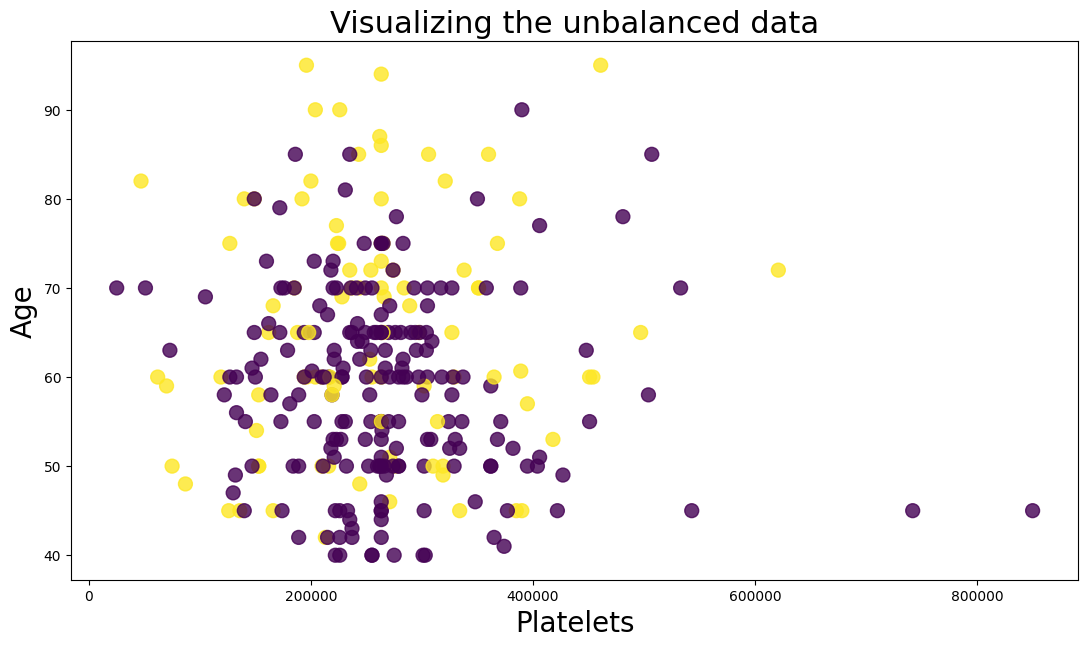

In [13]:
#Visualizing the unbalanced data with a scatter plot, the colors will depend on DEATH_EVENT (0 or 1)

plt.figure(figsize=(13,7))
plt.scatter(platelets, age, c=data["DEATH_EVENT"], s=100, alpha=0.8)
plt.xlabel("Platelets", fontsize=20)
plt.ylabel("Age", fontsize=20)
plt.title("Visualizing the unbalanced data", fontsize=22)
plt.show()

**Note:**

We can see that we do have more circles in purple than in yellow

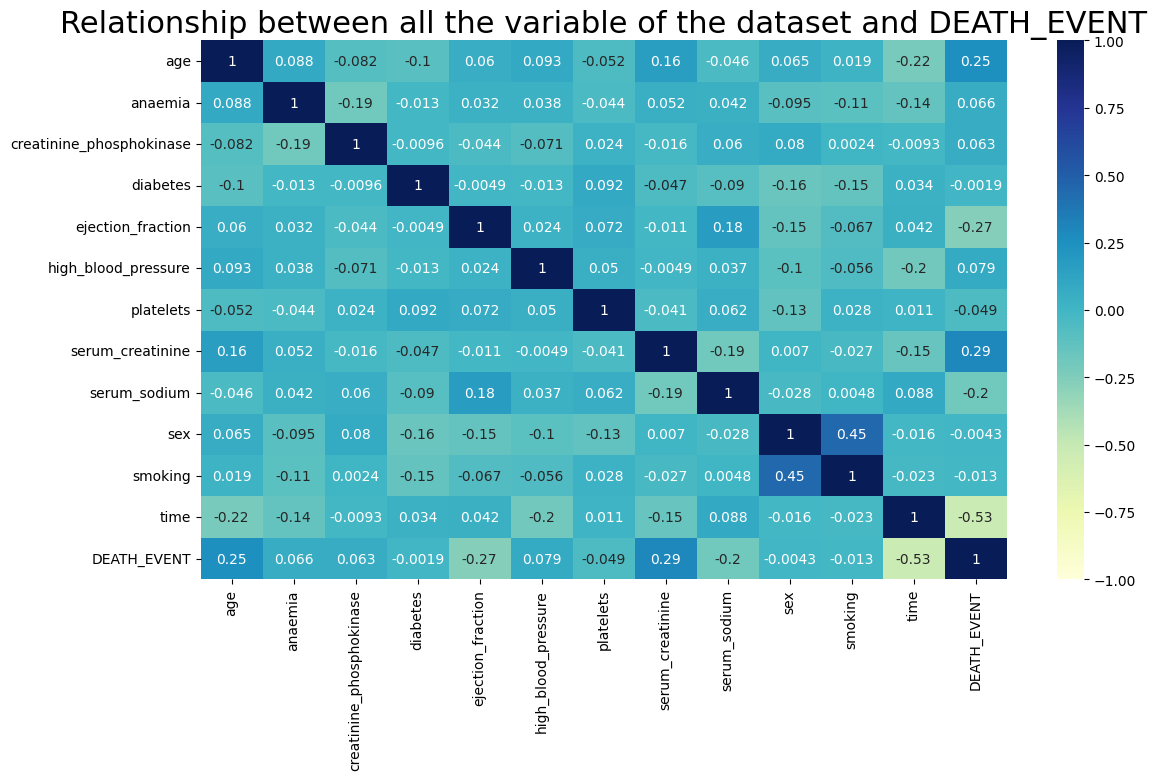

In [14]:
plt.figure(figsize=(13,7))
sns.heatmap(data.corr(), vmin=-1, vmax=1, cmap="YlGnBu", annot=True)
plt.title("Relationship between all the variable of the dataset and DEATH_EVENT", fontsize=22)
plt.show()

**Note:**

We notice that there is a positive correlation between DEATH_EVENT and serum creatinine and age. We have also a negative correlation between DEATH_EVENT and time, ejection fraction and serum sodium a little bit.

# 2. Data Visualization:

In [15]:
categorical_data = ["anaemia","diabetes","high_blood_pressure","sex","smoking"]
continuous_data = ["age","creatinine_phosphokinase","ejection_fraction","platelets","serum_creatinine","serum_sodium","time"]

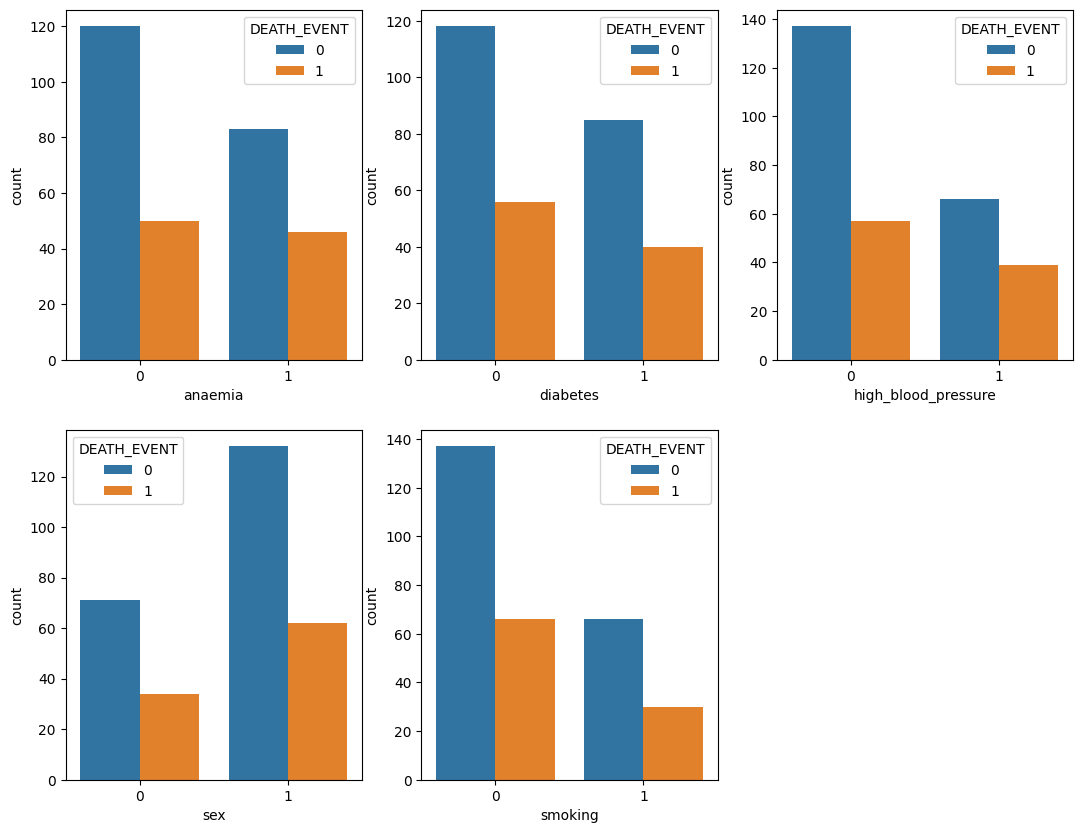

In [16]:
# Plotting the impact of categorical variables on DEATH_EVENT

plt.figure(figsize=(13,10))
for i, cat in enumerate(categorical_data):
    plt.subplot(2,3,i+1)
    sns.countplot(data=data, x=cat, hue="DEATH_EVENT")
plt.show()    

<AxesSubplot: xlabel='diabetes', ylabel='count'>

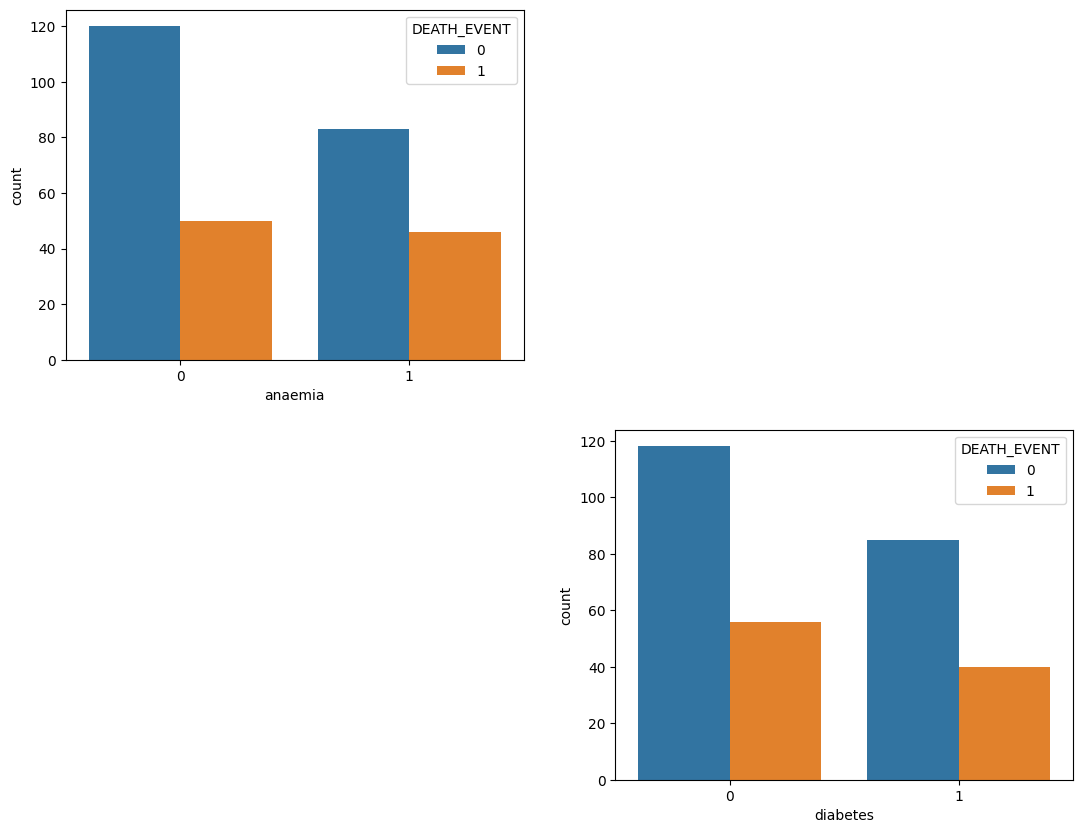

In [17]:
plt.figure(figsize=(13,10))
plt.subplot(2,2,1)
sns.countplot(data=data, x="anaemia", hue="DEATH_EVENT")
plt.subplot(2,2,4)
sns.countplot(data=data, x="diabetes", hue="DEATH_EVENT")

In [18]:
for i, cat in enumerate(categorical_data):
    print(i, cat)

0 anaemia
1 diabetes
2 high_blood_pressure
3 sex
4 smoking


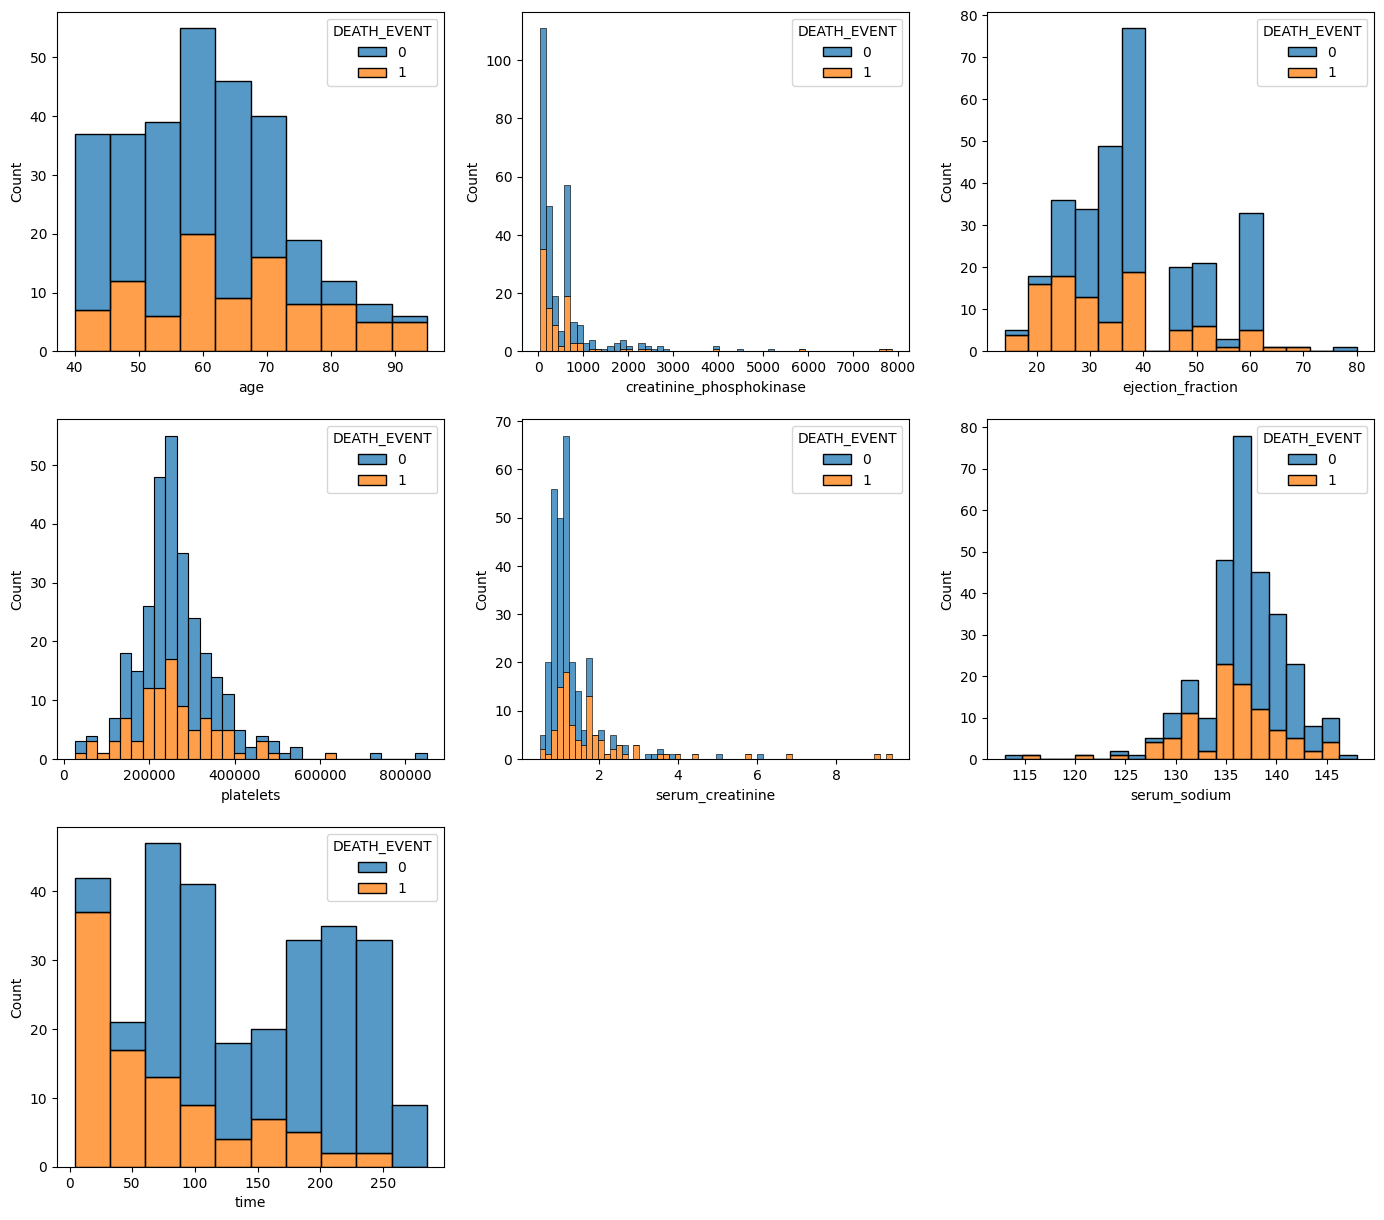

In [19]:
# Plotting the impact of continuous variables on DEATH_EVENT

plt.figure(figsize=(17,15))
for j, con in enumerate(continuous_data):
    plt.subplot(3,3,j+1)
    sns.histplot(data=data, x=con, hue="DEATH_EVENT", multiple="stack")
plt.show()    

In [20]:
for i, cat in enumerate(continuous_data):
    print(i, cat)

0 age
1 creatinine_phosphokinase
2 ejection_fraction
3 platelets
4 serum_creatinine
5 serum_sodium
6 time


<AxesSubplot: xlabel='age', ylabel='Count'>

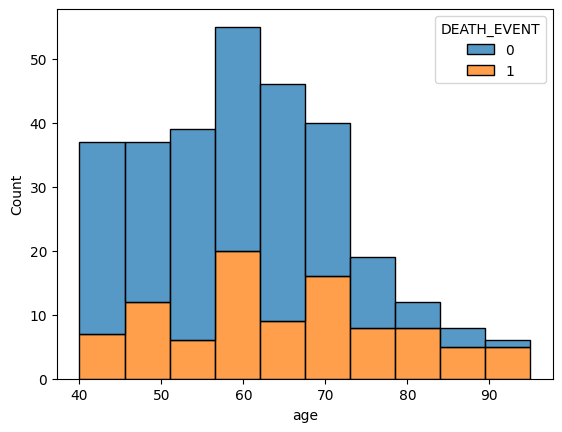

In [21]:
sns.histplot(data=data, x="age", hue="DEATH_EVENT", multiple="stack")

In [22]:
for i, cat in enumerate(continuous_data):
    print(i, cat)

0 age
1 creatinine_phosphokinase
2 ejection_fraction
3 platelets
4 serum_creatinine
5 serum_sodium
6 time


<AxesSubplot: xlabel='age', ylabel='Count'>

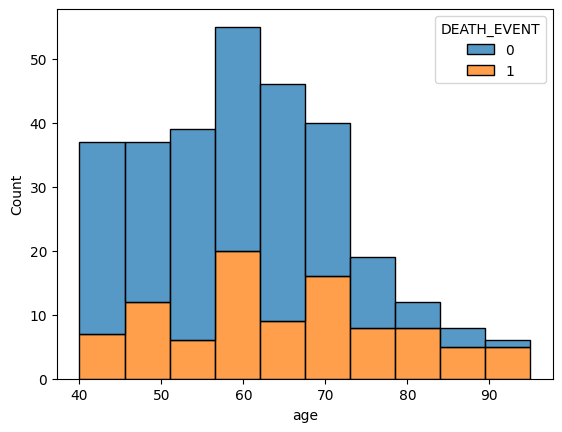

In [23]:
sns.histplot(data=data, x="age", hue="DEATH_EVENT", multiple="stack")

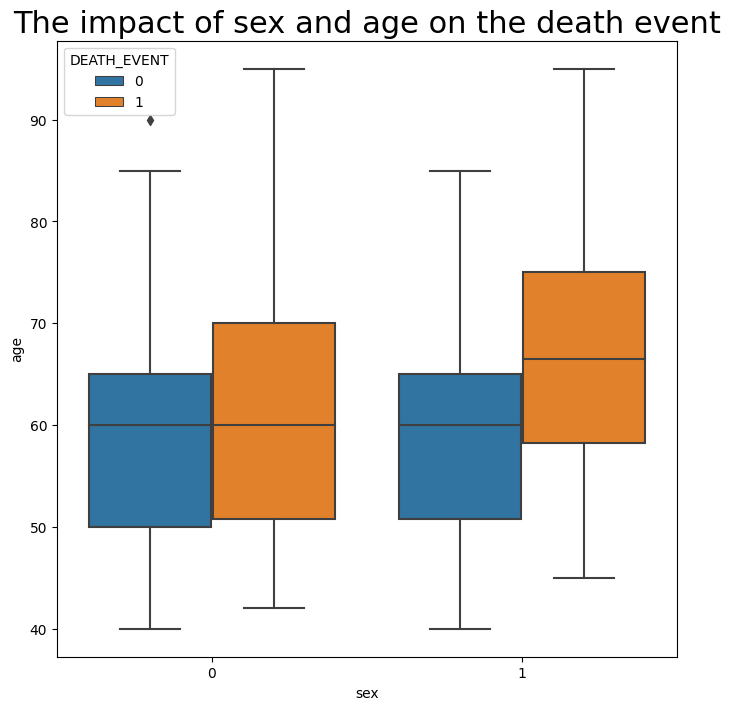

In [24]:
plt.figure(figsize=(8,8))
sns.boxplot(data=data, x="sex",y="age", hue="DEATH_EVENT")
plt.title("The impact of sex and age on the death event", fontsize=22)
plt.show()

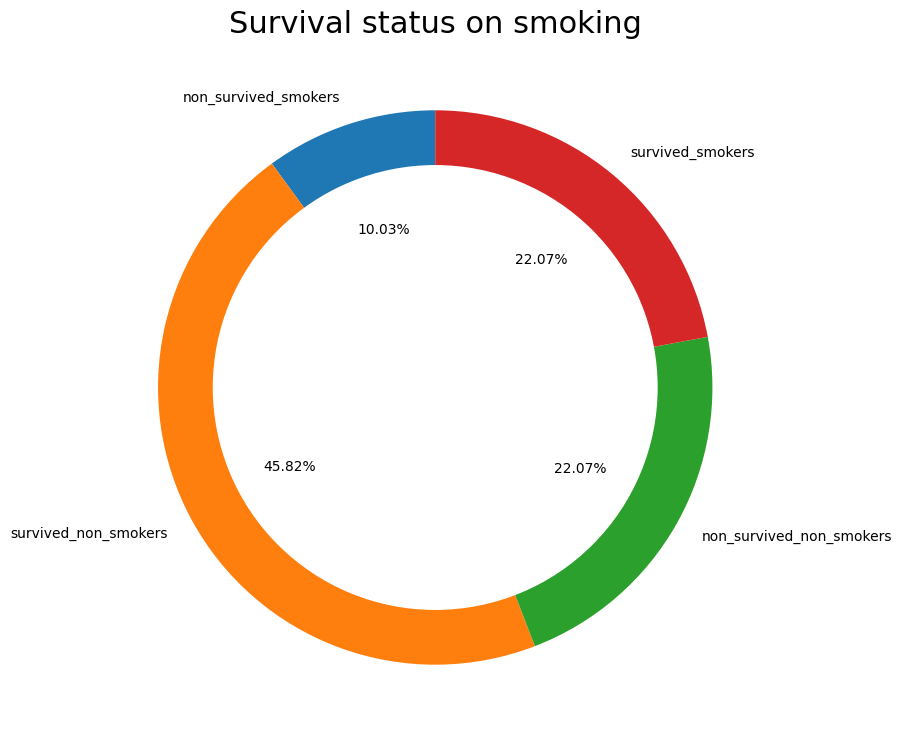

In [25]:
# Analyzing the survival status on smoking

smokers = data[data["smoking"]==1]
non_smokers = data[data["smoking"]==0]

non_survived_smokers = smokers[smokers["DEATH_EVENT"]==1]
survived_non_smokers = non_smokers[non_smokers["DEATH_EVENT"]==0]
non_survived_non_smokers = non_smokers[non_smokers["DEATH_EVENT"]==1]
survived_smokers = smokers[smokers["DEATH_EVENT"]==0]

smoking_data = [len(non_survived_smokers), len(survived_non_smokers),len(non_survived_non_smokers),len(survived_smokers)]
smoking_labels = ["non_survived_smokers", "survived_non_smokers", "non_survived_non_smokers", "survived_smokers"]

plt.figure(figsize=(9,9))
plt.pie(smoking_data, labels=smoking_labels, autopct="%.2f%%", startangle=90)
circle = plt.Circle((0,0), 0.8, color="White")
p = plt.gcf()
p.gca().add_artist(circle)
plt.title("Survival status on smoking", fontsize=22)
plt.show()

([<matplotlib.patches.Wedge at 0x2306103d710>,
 [Text(-0.34101771647194173, 1.045804435376071, 'non_survived_smokers'),
  Text(-0.9658242801224177, -0.5264821553728236, 'survived_non_smokers'),
  Text(0.9602393822474176, -0.5366007163441904, 'non_survived_non_smokers'),
  Text(0.7031236200758868, 0.8459415907090634, 'survived_smokers')],
 [Text(-0.18600966353015, 0.5704387829324022, '10.0%'),
  Text(-0.5268132437031369, -0.28717208474881284, '45.8%'),
  Text(0.5237669357713186, -0.2926912998241038, '22.1%'),
  Text(0.3835219745868473, 0.4614226858413072, '22.1%')])

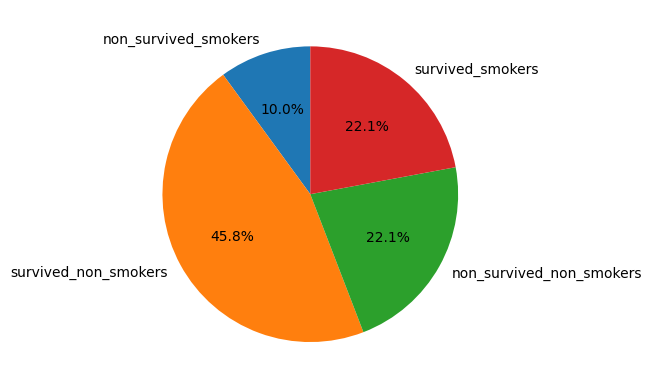

In [26]:
plt.pie(smoking_data, labels = smoking_labels, autopct = "%.1f%%", startangle = 90)

In [27]:
type(non_smokers)

pandas.core.frame.DataFrame

In [28]:
smokers[smokers["DEATH_EVENT"]==1]

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
2,65.0,0,146,0,20,0,162000.00,1.30,129,1,1,7,1
5,90.0,1,47,0,40,1,204000.00,2.10,132,1,1,8,1
7,60.0,1,315,1,60,0,454000.00,1.10,131,1,1,10,1
9,80.0,1,123,0,35,1,388000.00,9.40,133,1,1,10,1
10,75.0,1,81,0,38,1,368000.00,4.00,131,1,1,10,1
11,62.0,0,231,0,25,1,253000.00,0.90,140,1,1,10,1
22,68.0,1,220,0,35,1,289000.00,0.90,140,1,1,20,1
25,80.0,0,148,1,38,0,149000.00,1.90,144,1,1,23,1
27,70.0,0,122,1,45,1,284000.00,1.30,136,1,1,26,1
29,82.0,0,70,1,30,0,200000.00,1.20,132,1,1,26,1


In [29]:
(len(non_survived_smokers)/299)*100

10.033444816053512

In [30]:
len(smokers[smokers["DEATH_EVENT"]==1])

30

In [31]:
smoking_data

[30, 137, 66, 66]

In [32]:
smoking_labels

['non_survived_smokers',
 'survived_non_smokers',
 'non_survived_non_smokers',
 'survived_smokers']

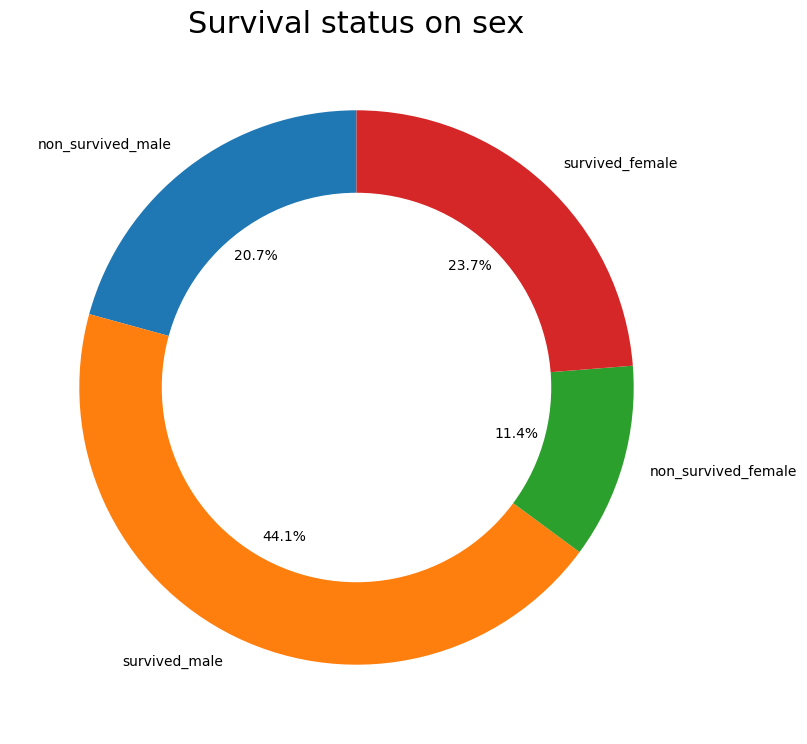

In [33]:
# Analyzing the survival status on sex

male = data[data["sex"]==1]
female = data[data["sex"]==0]

non_survived_male = male[male["DEATH_EVENT"]==1]
survived_male = male[male["DEATH_EVENT"]==0]
non_survived_female = female[female["DEATH_EVENT"]==1]
survived_female = female[female["DEATH_EVENT"]==0]

sex_data = [len(non_survived_male), len(survived_male), len(non_survived_female), len(survived_female)]
sex_labels = ["non_survived_male","survived_male","non_survived_female","survived_female"]

plt.figure(figsize=(9,9))
plt.pie(sex_data, labels= sex_labels, autopct="%.1f%%", startangle=90)
circle = plt.Circle((0,0), 0.7, color="white")
p = plt.gcf()
p.gca().add_artist(circle)
plt.title("Survival status on sex", fontsize=22)
plt.show()

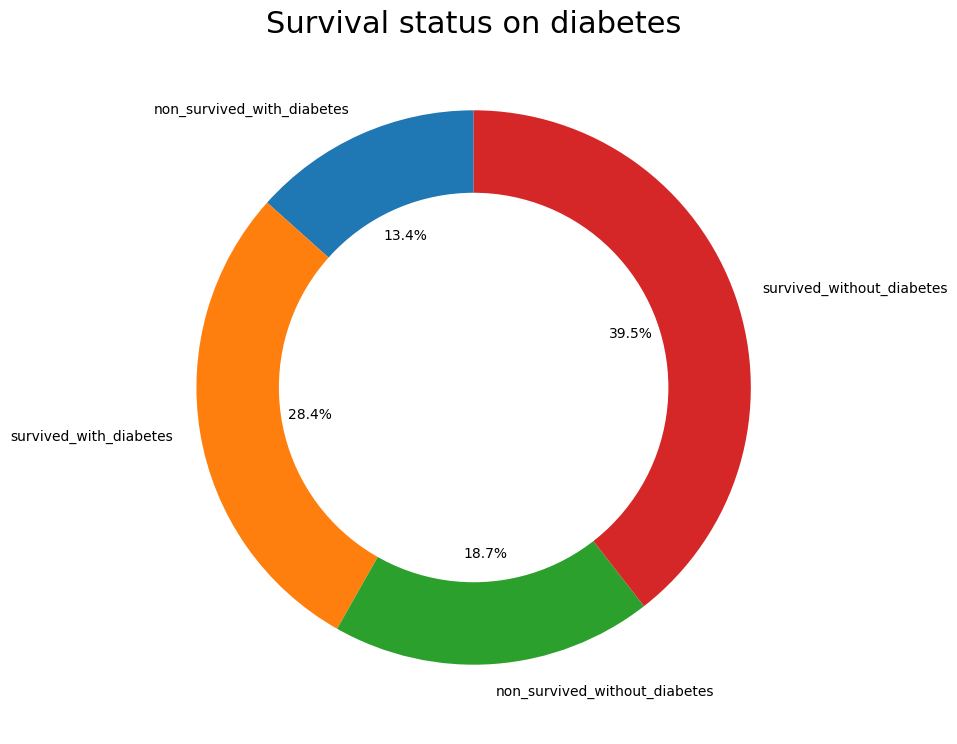

In [34]:
# Analyzing the survival status on diabetes

with_diabetes = data[data["diabetes"]==1]
without_diabetes = data[data["diabetes"]==0]

non_survived_with_diabetes = with_diabetes[with_diabetes["DEATH_EVENT"]==1]
survived_with_diabetes = with_diabetes[with_diabetes["DEATH_EVENT"]==0]
non_survived_without_diabetes = without_diabetes[without_diabetes["DEATH_EVENT"]==1]
survived_without_diabetes = without_diabetes[without_diabetes["DEATH_EVENT"]==0]

diabetes_data = [len(non_survived_with_diabetes), len(survived_with_diabetes), len(non_survived_without_diabetes), len(survived_without_diabetes)]

diabetes_labels = ["non_survived_with_diabetes","survived_with_diabetes","non_survived_without_diabetes", "survived_without_diabetes"]


plt.figure(figsize=(9,9))
plt.pie(diabetes_data, labels = diabetes_labels, autopct="%.1f%%", startangle=90)
circle = plt.Circle((0,0), 0.7, color="white")
p = plt.gcf()
p.gca().add_artist(circle)
plt.title("Survival status on diabetes", fontsize=22)
plt.show()

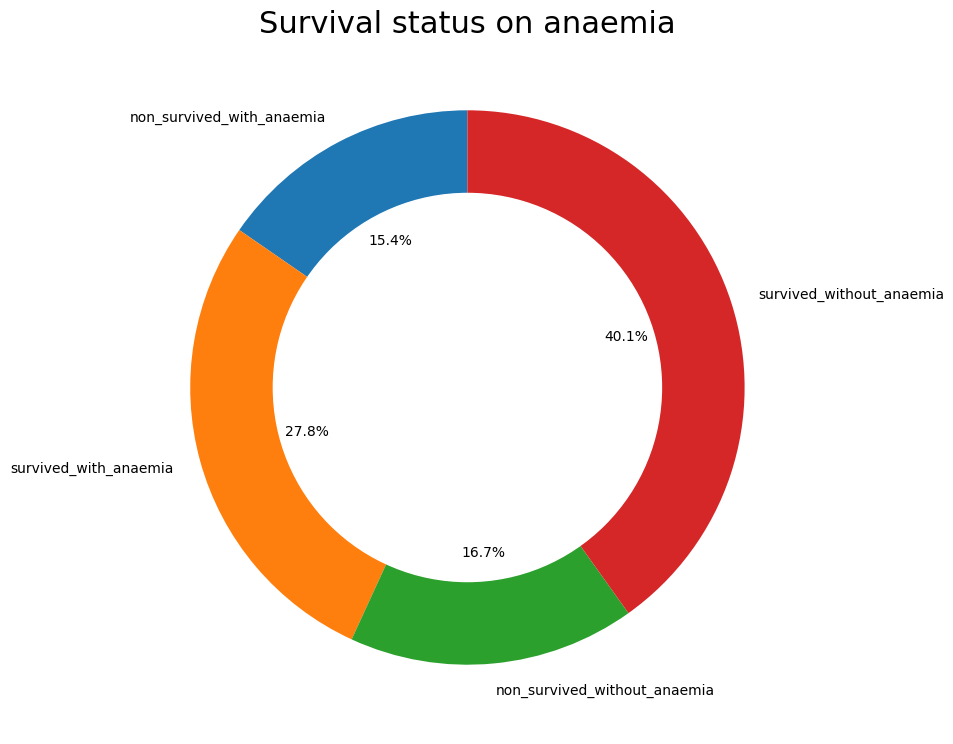

In [35]:
# Analyzing the survival status on anaemia

with_anaemia = data[data["anaemia"]==1]
without_anaemia = data[data["anaemia"]==0]

non_survived_with_anaemia = with_anaemia[with_anaemia["DEATH_EVENT"]==1]
survived_with_anaemia = with_anaemia[with_anaemia["DEATH_EVENT"]==0]
non_survived_without_anaemia = without_anaemia[without_anaemia["DEATH_EVENT"]==1]
survived_without_anaemia = without_anaemia[without_anaemia["DEATH_EVENT"]==0]

anaemia_data = [len(non_survived_with_anaemia), len(survived_with_anaemia), len(non_survived_without_anaemia), len(survived_without_anaemia)]

anaemia_labels = ["non_survived_with_anaemia","survived_with_anaemia","non_survived_without_anaemia", "survived_without_anaemia"]


plt.figure(figsize=(9,9))
plt.pie(anaemia_data, labels = anaemia_labels, autopct="%.1f%%", startangle=90)
circle = plt.Circle((0,0), 0.7, color="white")
p = plt.gcf()
p.gca().add_artist(circle)
plt.title("Survival status on anaemia", fontsize=22)
plt.show()


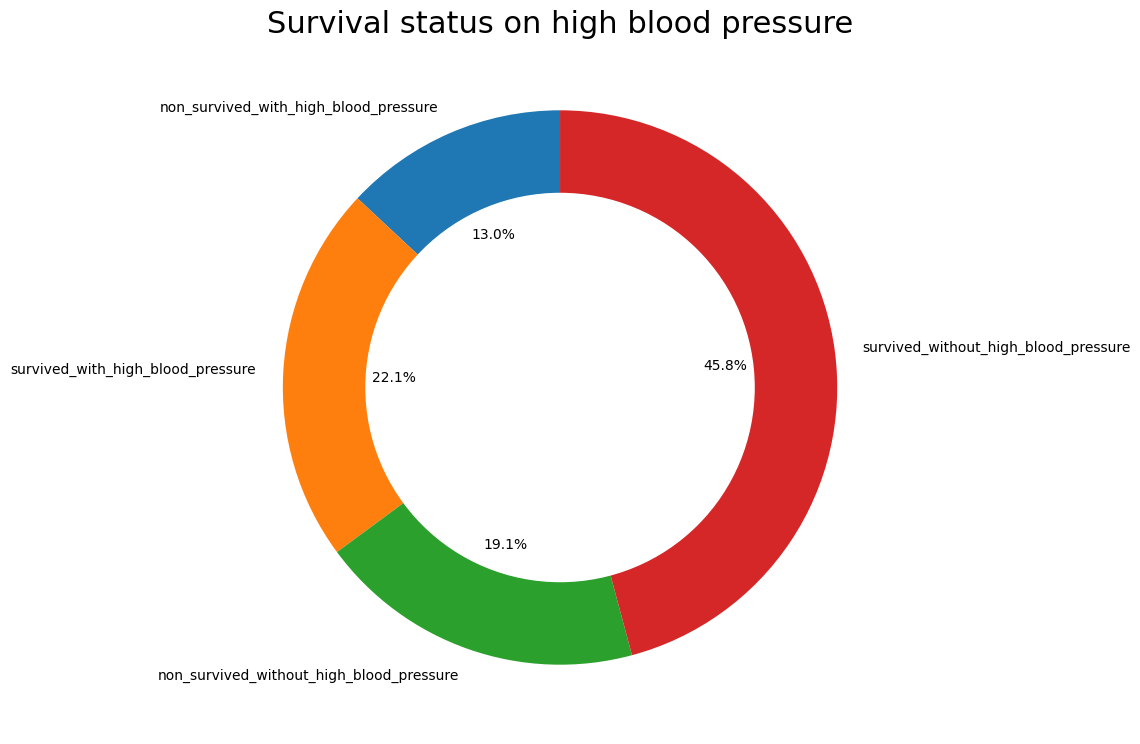

In [36]:
with_high_blood_pressure = data[data["high_blood_pressure"]==1]
without_high_blood_pressure = data[data["high_blood_pressure"]==0]

non_survived_with_high_blood_pressure = with_high_blood_pressure[with_high_blood_pressure["DEATH_EVENT"]==1]
survived_with_high_blood_pressure = with_high_blood_pressure[with_high_blood_pressure["DEATH_EVENT"]==0]
non_survived_without_high_blood_pressure = without_high_blood_pressure[without_high_blood_pressure["DEATH_EVENT"]==1]
survived_without_high_blood_pressure = without_high_blood_pressure[without_high_blood_pressure["DEATH_EVENT"]==0]

high_blood_pressure_data = [len(non_survived_with_high_blood_pressure), len(survived_with_high_blood_pressure), len(non_survived_without_high_blood_pressure), len(survived_without_high_blood_pressure)]

high_blood_pressure_labels = ["non_survived_with_high_blood_pressure","survived_with_high_blood_pressure","non_survived_without_high_blood_pressure", "survived_without_high_blood_pressure"]


plt.figure(figsize=(9,9))
plt.pie(high_blood_pressure_data, labels = high_blood_pressure_labels, autopct="%.1f%%", startangle=90)
circle = plt.Circle((0,0), 0.7, color="white")
p = plt.gcf()
p.gca().add_artist(circle)
plt.title("Survival status on high blood pressure", fontsize=22)
plt.show()



# 3. Data modelling & prediction using continuous data:

In [37]:
x=data[["age","creatinine_phosphokinase","ejection_fraction","serum_creatinine","serum_sodium","time"]]
y=data["DEATH_EVENT"]

In [38]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=2)

In [39]:
# Data scaling
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [40]:
accuracy_list=[] # A list to save all the values from different models accuracy for comparison using a bar chart

# 3.1 Logistic Regression

In [41]:
lr_model = LogisticRegression()
lr_model.fit(x_train_scaled, y_train)
lr_prediction = lr_model.predict(x_test_scaled)
lr_accuracy = (round(accuracy_score(lr_prediction, y_test), 4)*100) #percentage
accuracy_list.append(lr_accuracy)

# 3.2 Support Vector Machine

In [42]:
svc_model = SVC()
svc_model.fit(x_train_scaled, y_train)
svc_prediction = svc_model.predict(x_test_scaled)
svc_accuracy = (round(accuracy_score(svc_prediction, y_test), 4)*100) #percentage
accuracy_list.append(svc_accuracy)

# 3.3 KNearestNeighbor:

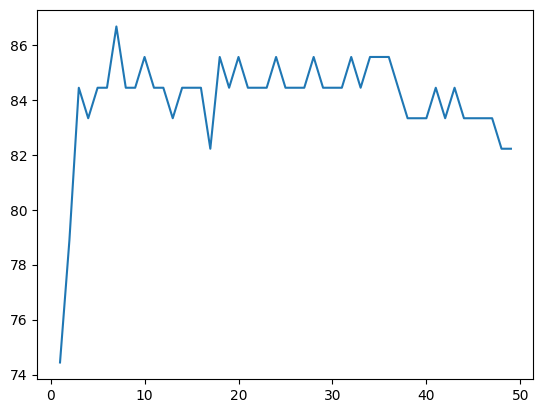

In [43]:
# We use this program to find the optimal value of k

knn_list=[]
for k in range(1,50):
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(x_train_scaled, y_train)
    knn_prediction = knn_model.predict(x_test_scaled)
    knn_accuracy = (round(accuracy_score(knn_prediction, y_test), 4)*100)
    knn_list.append(knn_accuracy)
k = np.arange(1,50)
plt.plot(k, knn_list)

In [44]:
knn_model = KNeighborsClassifier(n_neighbors=6)
knn_model.fit(x_train_scaled, y_train)
knn_prediction = knn_model.predict(x_test_scaled)
knn_accuracy = (round(accuracy_score(knn_prediction, y_test), 4)*100) #percentage
accuracy_list.append(knn_accuracy)

# 3.4 Decison Tree Classifier

In [45]:
dt_model = DecisionTreeClassifier(criterion="entropy", max_depth=2)
dt_model.fit(x_train_scaled, y_train)
dt_prediction = dt_model.predict(x_test_scaled)
dt_accuracy = (round(accuracy_score(dt_prediction , y_test), 4)*100) #percentage
accuracy_list.append(dt_accuracy)

# 3.5 Naive Bayes

In [46]:
nb_model = GaussianNB()
nb_model.fit(x_train_scaled, y_train)
nb_prediction = nb_model.predict(x_test_scaled)
nb_accuracy = (round(accuracy_score(nb_prediction, y_test), 4)*100) #percentage
accuracy_list.append(nb_accuracy)

# 3.6 Random Forest Classifier

In [47]:
rf_model = RandomForestClassifier()
rf_model.fit(x_train_scaled, y_train)
rf_prediction = rf_model.predict(x_test_scaled)
rf_accuracy = (round(accuracy_score(rf_prediction, y_test), 4)*100) #percentage
accuracy_list.append(rf_accuracy)

In [48]:
accuracy_list

[87.78, 84.44, 84.44, 88.89, 82.22, 86.67]

In [49]:
models = ["Logistic Regression","SVC","KNearestNeighbors","Decision Tree", "Naive Bayes", "Random Forest"]

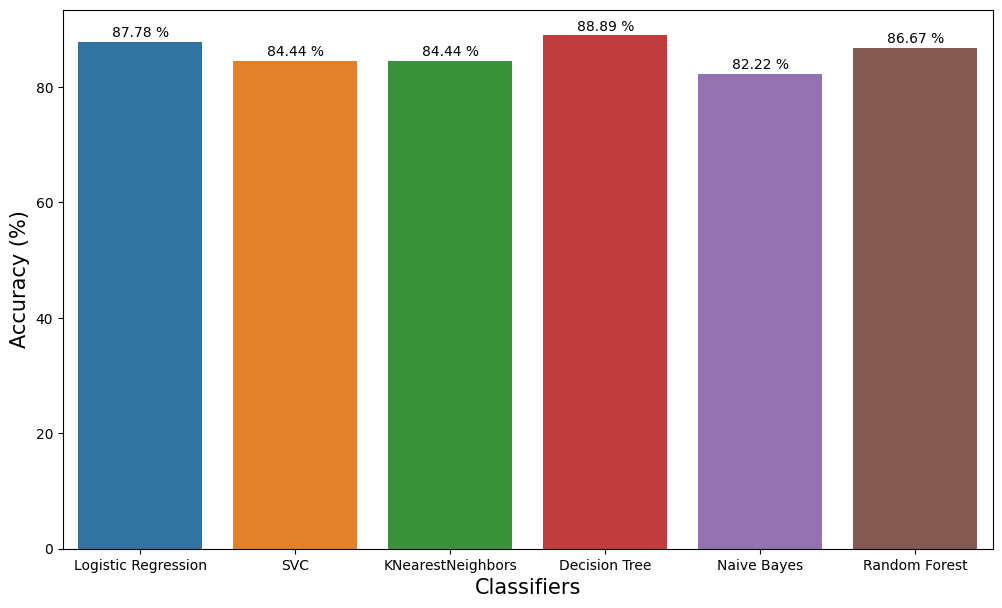

In [50]:
plt.figure(figsize=(12,7))
ax = sns.barplot(x=models, y=accuracy_list)
plt.xlabel("Classifiers", fontsize=15)
plt.ylabel("Accuracy (%)", fontsize=15)
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x = p.get_x()
    y = p.get_y()
    ax.annotate(f"{height} %", (x + width/2, y + height*1.01), ha="center")
plt.show()    